# Single run testing 

At initialization, asset and liabilites are equal 
$$\alpha D + \beta D + L  = \frac{1}{1-\gamma} D$$
$$\alpha + \beta \leq \frac{1}{1-\gamma}$$

## central

In [3]:
gamma=0.03
2.65*gamma

0.0795

In [2]:
from dynamics import ClassDynamics
from network import ClassNetwork

# parameter setting
nb_banks=50
path_results="./results/single_run/test/"


# reg ratios
alpha_init=False # initial cash (< 1/(1-gamma) - beta)
alpha=0.01
beta_init=0.4 # initial collateral  (< 1/(1-gamma) - alpha)
beta_reg=0.4
beta_star=0.4
gamma=0.03
gamma_init = 2.5*gamma #3*gamma
collateral_value=1.0

# initialisation of deposits size or through money creation
initialization_method="pareto"
alpha_pareto=1.4
initial_deposits_size = 40 #40 if False, use the init money min and money creation
init_money_min = 1e-2 # 10 million money units, minimum for a bank license

# shocks on deposits
shocks_method="non-conservative"
shocks_law="normal-mean-reverting"
shocks_vol=0.05 # 0.08


# speed of learning
learning_speed = 0.5 #0.5

# min trans size
min_repo_trans_size=1e-8  # 1e-8

# dynamics & ploting
nb_steps=int(20e3) #int(10e3)
dump_period=int(5e2) #int(5e2)
plot_period=int(5e2) #int(5e2)
cp_option=True
heavy_plot=False

# LCR mgt
LCR_mgt_opt=True

# leverage mgt
end_repo_period=False # if int, periodic end repo / if false, leverage mgt
gamma_star = 1.5*gamma #1.5
check_leverage_opt = False # to avoid killing the run if one or several banks are below min leverage due to high shocks (there is not possibility of decrease balance sheet size if no interbank borrowings)

# money creation
loan_tenor=nb_steps #nb_steps # if int, money creation / if false. no new loans
loan_period=1
new_loans_vol = 10 #5 standard deviation around the mean creation of loans (if initial deposits size not False)
new_loans_mean = 2e-2/250 #2e-2/250 daily mean increase in loans expressed as a percentage of the intital loans, meaning linear growth (or of the current loans, then meaning exponential growth)
beta_new = beta_reg # if number, new colat / if false, no new colat 
gamma_new = 2.5*gamma # 2*gamma_star


# substitution of collateral
substitution = False

# Quantitative easing scenario
QE_start = False
QE_stop = False

# GFC scenario
no_trust_start = False
no_trust_stop = False

# initialize ClassNetwork
Network = ClassNetwork(
    nb_banks=nb_banks,
    initial_deposits_size=initial_deposits_size,
    alpha_init=alpha_init,
    alpha=alpha,
    beta_init=beta_init,
    beta_reg=beta_reg,
    beta_star=beta_star,
    beta_new=beta_new,
    gamma_init=gamma_init,
    gamma=gamma,
    gamma_star=gamma_star,
    gamma_new=gamma_new,
    collateral_value=collateral_value,
    initialization_method=initialization_method,
    alpha_pareto=alpha_pareto,
    shocks_method=shocks_method,
    shocks_law=shocks_law,
    shocks_vol=shocks_vol,
    LCR_mgt_opt=LCR_mgt_opt,
    min_repo_trans_size=min_repo_trans_size,
    loan_tenor=loan_tenor,
    loan_period=loan_period,
    new_loans_vol=new_loans_vol,
    new_loans_mean=new_loans_mean,
    end_repo_period=end_repo_period,
    substitution=substitution,
    learning_speed=learning_speed,
    check_leverage_opt=check_leverage_opt,
    init_money_min=init_money_min,
    QE_start=QE_start,
    QE_stop=QE_stop,
    no_trust_start=no_trust_start,
    no_trust_stop=no_trust_stop,
)

# initialize ClassDynamics
Dynamics = ClassDynamics(
    Network,
    nb_steps=nb_steps,
    path_results=path_results,
    dump_period=dump_period,
    plot_period=plot_period,
    cp_option=cp_option,
    heavy_plot=heavy_plot,
)

# simulate
Dynamics.simulate()

simulate the repo market


 34%|███▍      | 6795/19999 [44:10<27:50,  7.91it/s]    

# ploting

In [ ]:
# get graphics after interupting 
import graphics  as gx
Dynamics.nb_steps = Network.step
Dynamics.plot_period = Network.step
Dynamics.fill()
Dynamics.dump()
gx.plot(Dynamics)

# analysis

In [ ]:
import numpy as np 
for chain in Network.chains_rev_repo:
   if  len(np.unique (np.array(chain))) < len(np.array(chain)):
      print("error")

In [ ]:
max = 0 
min = 19
sum = 0
for chain in Network.chains_rev_repo:
   if  len(chain) > max:
      max = len(chain)
   if  len(chain) < min:
      min = len(chain)
   sum +=len(chain)

print(max)
print(min)
print(sum/len(Network.chains_rev_repo))

# balance sheet chart

In [2]:
Dynamics

In [4]:
import graphics as gx
path_results = Dynamics.path_results
plot_period = Dynamics.plot_period
days = range(Dynamics.Network.step + 1)  # to cover all steps up to now
dic_dashed_trajectory = Dynamics.dic_dashed_trajectory

gx.plot_balance_sheet(
            dic_dashed_trajectory,
            days,
            plot_period,
            f"{path_results}accounting_view/balance_sheet/",
        )

In [5]:
f"{path_results}accounting_view/balance_sheet/"

'./results/single_run/test/accounting_view/balance_sheet/'

# new loans

(array([47.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00193   , 0.01135738, 0.02078475, 0.03021213, 0.0396395 ,
        0.04906688, 0.05849425, 0.06792163, 0.077349  , 0.08677638,
        0.09620375]),
 <BarContainer object of 10 artists>)

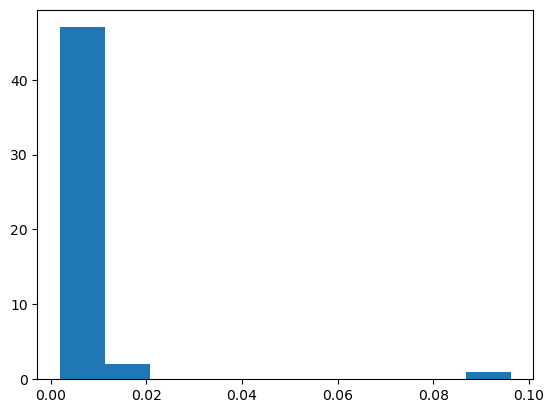

In [3]:
import numpy as np
from matplotlib import pyplot as plt
ar_new_loans = (np.random.randn(nb_banks) * new_loans_vol + 1)*new_loans_mean
plt.hist(ar_new_loans*Network.df_banks["initial loans"])

# trust

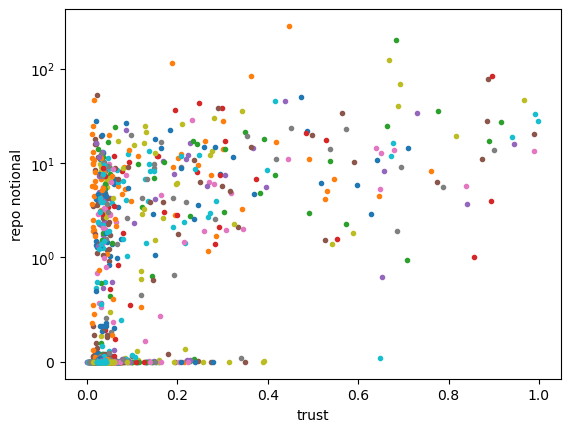

In [13]:
from matplotlib import pyplot as plt

bank_id = 10
for bank_id in range(50):
    # arr_repo_exp = np.array(list(Network.banks[bank_id].on_repo_exp.values())) + np.array(list(Network.banks[bank_id].off_repo_exp.values()))
    arr_repo_exp = np.delete(Dynamics.arr_rev_repo_exp_adj[Network.step].T[bank_id],bank_id)
    arr_trust = np.array(list(Network.banks[bank_id].trust.values()))
    plt.plot(arr_trust,arr_repo_exp,".")
plt.ylabel("repo notional")
plt.xlabel("trust")
plt.yscale("symlog",linthresh=1)
# plt.xscale("symlog",linthresh=0.5)

In [14]:
import pandas as pd
corels = pd.Series()
for bank_id in range(50):
    arr_repo_exp = np.delete(Dynamics.arr_rev_repo_exp_adj[Network.step].T[bank_id],bank_id)
    arr_trust = np.array(list(Network.banks[bank_id].trust.values()))
    corels.loc[bank_id] = np.corrcoef(arr_trust,arr_repo_exp)[0,1]

/opt/tmp/tmp/ipykernel_200115/2939704745.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corels = pd.Series()


In [16]:
corels.dropna().mean()

0.6637959841164267

Text(0.5, 0, 'trust')

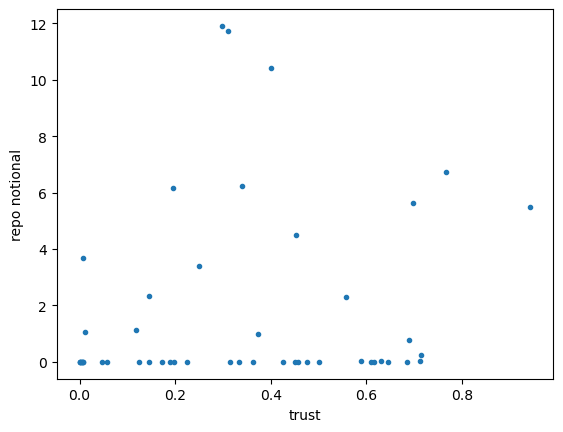

In [7]:
bank_id = 49
arr_repo_exp = np.array(list(Network.banks[bank_id].on_repo_exp.values())) + np.array(list(Network.banks[bank_id].off_repo_exp.values()))
plt.plot(Network.banks[bank_id].trust.values(),arr_repo_exp,".")
plt.ylabel("repo notional")
plt.xlabel("trust")
# plt.yscale("symlog",linthresh=1)
# plt.xscale("log")

In [43]:
Network.banks[bank_id].trust.values()

dict_values([9.90099000000984e-09, 1.31209856778925e-10, 9.900000494862494e-13, 4.708720919692996e-13, 9.999999999959347e-05, 2.2030948211126405e-13, 1.6320740313730157e-11, 1.326195427175033e-12, 0.5283188052348504, 0.0351996994724556, 9.144247965207152e-14, 8.976402289807052e-13, 3.5025046393602706e-13, 2.9531528201564764e-13, 9.938423777047e-13, 9.066278285629948e-12, 0.003262046907809516, 1.1215515527844772e-05, 2.3365978237609464e-13, 2.175484078264416e-05, 3.775478718605815e-13, 6.013016567645328e-14, 0.9900000037131637, 2.317693351676104e-05, 1.1784230042709212e-13, 1.503175234102261e-09, 6.118544042369962e-13, 6.979506871103202e-13, 5.25698160530586e-06, 2.1952861341118224e-13, 5.489061163608935e-14, 1.3818489745049498e-12, 6.089334525295198e-13, 1.2723092605004175e-12, 3.313608877409158e-07, 9.754960080159138e-13, 5.983185382088217e-14, 2.8146921182057878e-05, 4.2458912042013583e-13, 2.674096073242838e-13, 1.4579552228313232e-05, 3.9966064325213345e-05, 4.97462707797047e-13, 2

In [44]:
arr_repo_exp

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

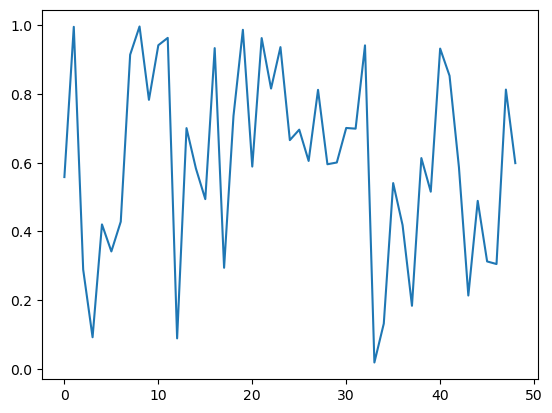

In [22]:
plt.plot(Network.banks[bank_id].trust.values())

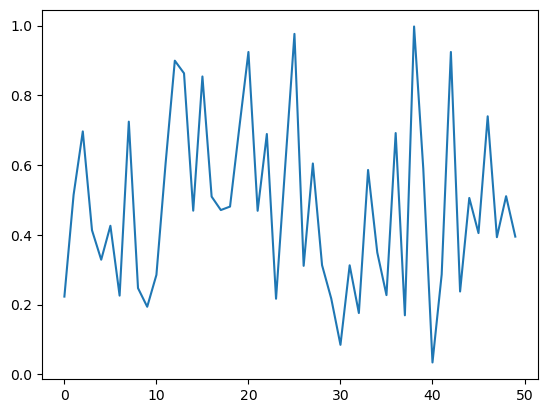

In [10]:
import numpy as np
plt.plot(np.random.uniform(0,1,50))

# power law

In [5]:
Dynamics.df_network_trajectory.loc[999].iloc[-100:-50]

powerlaw alpha repo balance                             NaN
powerlaw direction exponential repo balance             NaN
powerlaw direction lognormal repo balance               NaN
powerlaw direction power_law repo balance               NaN
powerlaw p-value exponential repo balance               NaN
powerlaw p-value lognormal repo balance                 NaN
powerlaw p-value power_law repo balance                 NaN
powerlaw fit central bank funding                       NaN
powerlaw alpha central bank funding                     NaN
powerlaw direction exponential central bank funding     NaN
powerlaw direction lognormal central bank funding       NaN
powerlaw direction power_law central bank funding       NaN
powerlaw p-value exponential central bank funding       NaN
powerlaw p-value lognormal central bank funding         NaN
powerlaw p-value power_law central bank funding         NaN
powerlaw fit securities collateral                      NaN
powerlaw alpha securities collateral    